In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
netflix_originals = pd.read_csv('NetflixOriginals.csv', encoding="ISO-8859-1")

In [ ]:
netflix_originals.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [ ]:
netflix_originals.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [ ]:
#1. Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? #Görselleştirme yapınız.
netflix_originals[netflix_originals["Runtime"] >= 120].describe

<bound method NDFrame.describe of                                      Title                Genre  \
5                                    Drive               Action   
7          The Last Days of American Crime  Heist film/Thriller   
9                       Sardar Ka Grandson               Comedy   
16                           Ghost Stories     Horror anthology   
23                   The Girl on the Train             Thriller   
..                                     ...                  ...   
562             The Trial of the Chicago 7                Drama   
564                                 Icarus          Documentary   
565                         Marriage Story                Drama   
579  Taylor Swift: Reputation Stadium Tour         Concert Film   
581                Springsteen on Broadway         One-man show   

              Premiere  Runtime  IMDB Score Language  
5     November 1, 2019      147         3.5    Hindi  
7         June 5, 2020      149         3.7  Englis

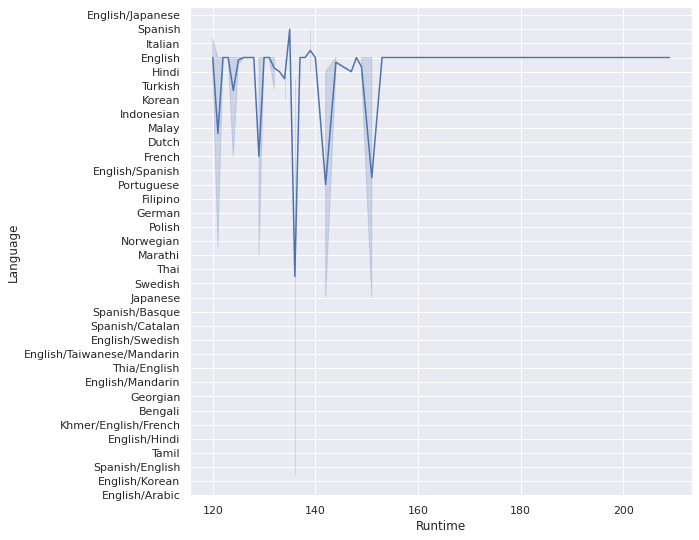

In [8]:
sns.lineplot(y=netflix_originals["Language"], x=netflix_originals.loc[(netflix_originals["Runtime"] >= 120)]["Runtime"])
sns.set(rc={'figure.figsize':(9,9)})
plt.show()

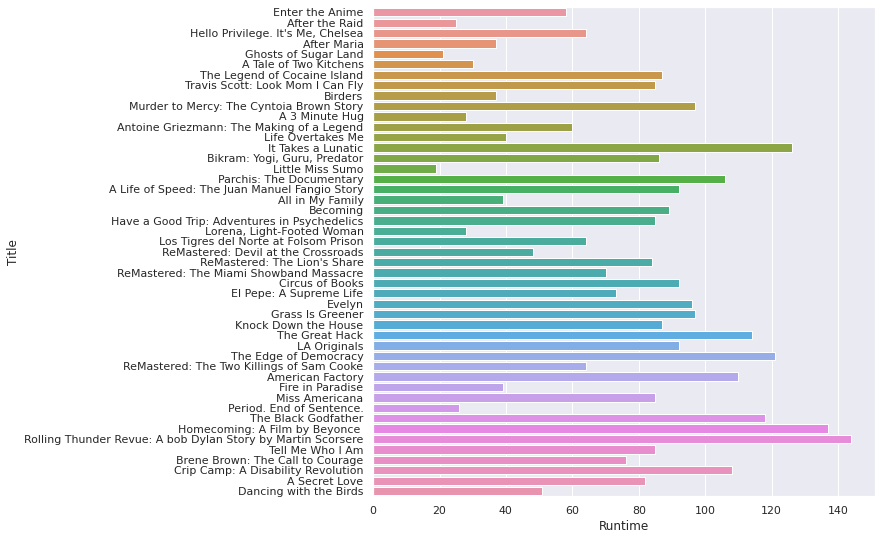

In [ ]:
#2. 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.
netflix_originals["Date"] = pd.to_datetime(netflix_originals.Premiere)

documentary = netflix_originals.loc[(netflix_originals["Genre"] == "Documentary") & (netflix_originals["Date"] > "2019-01-31") & (netflix_originals["Date"] < "2020-06-01")]
sns.barplot(y=documentary["Title"], x=documentary["Runtime"])
sns.set(rc={'figure.figsize':(10,9)})
plt.show()

In [ ]:
#3. İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?
ing_films = netflix_originals.loc[(netflix_originals["Language"] == "English")]

ing_films.sort_values(by="IMDB Score", ascending=False)[:1]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020-10-04


In [ ]:
#4. 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?
hindi_films = netflix_originals.loc[(netflix_originals["Language"] == "Hindi")]

In [ ]:
from statistics import mean
mean(hindi_films["Runtime"])

115.78787878787878

In [ ]:
#5. 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.
netflix_originals['Genre'].nunique()

115

In [ ]:
genre_type = netflix_originals['Genre'].value_counts(normalize=True)

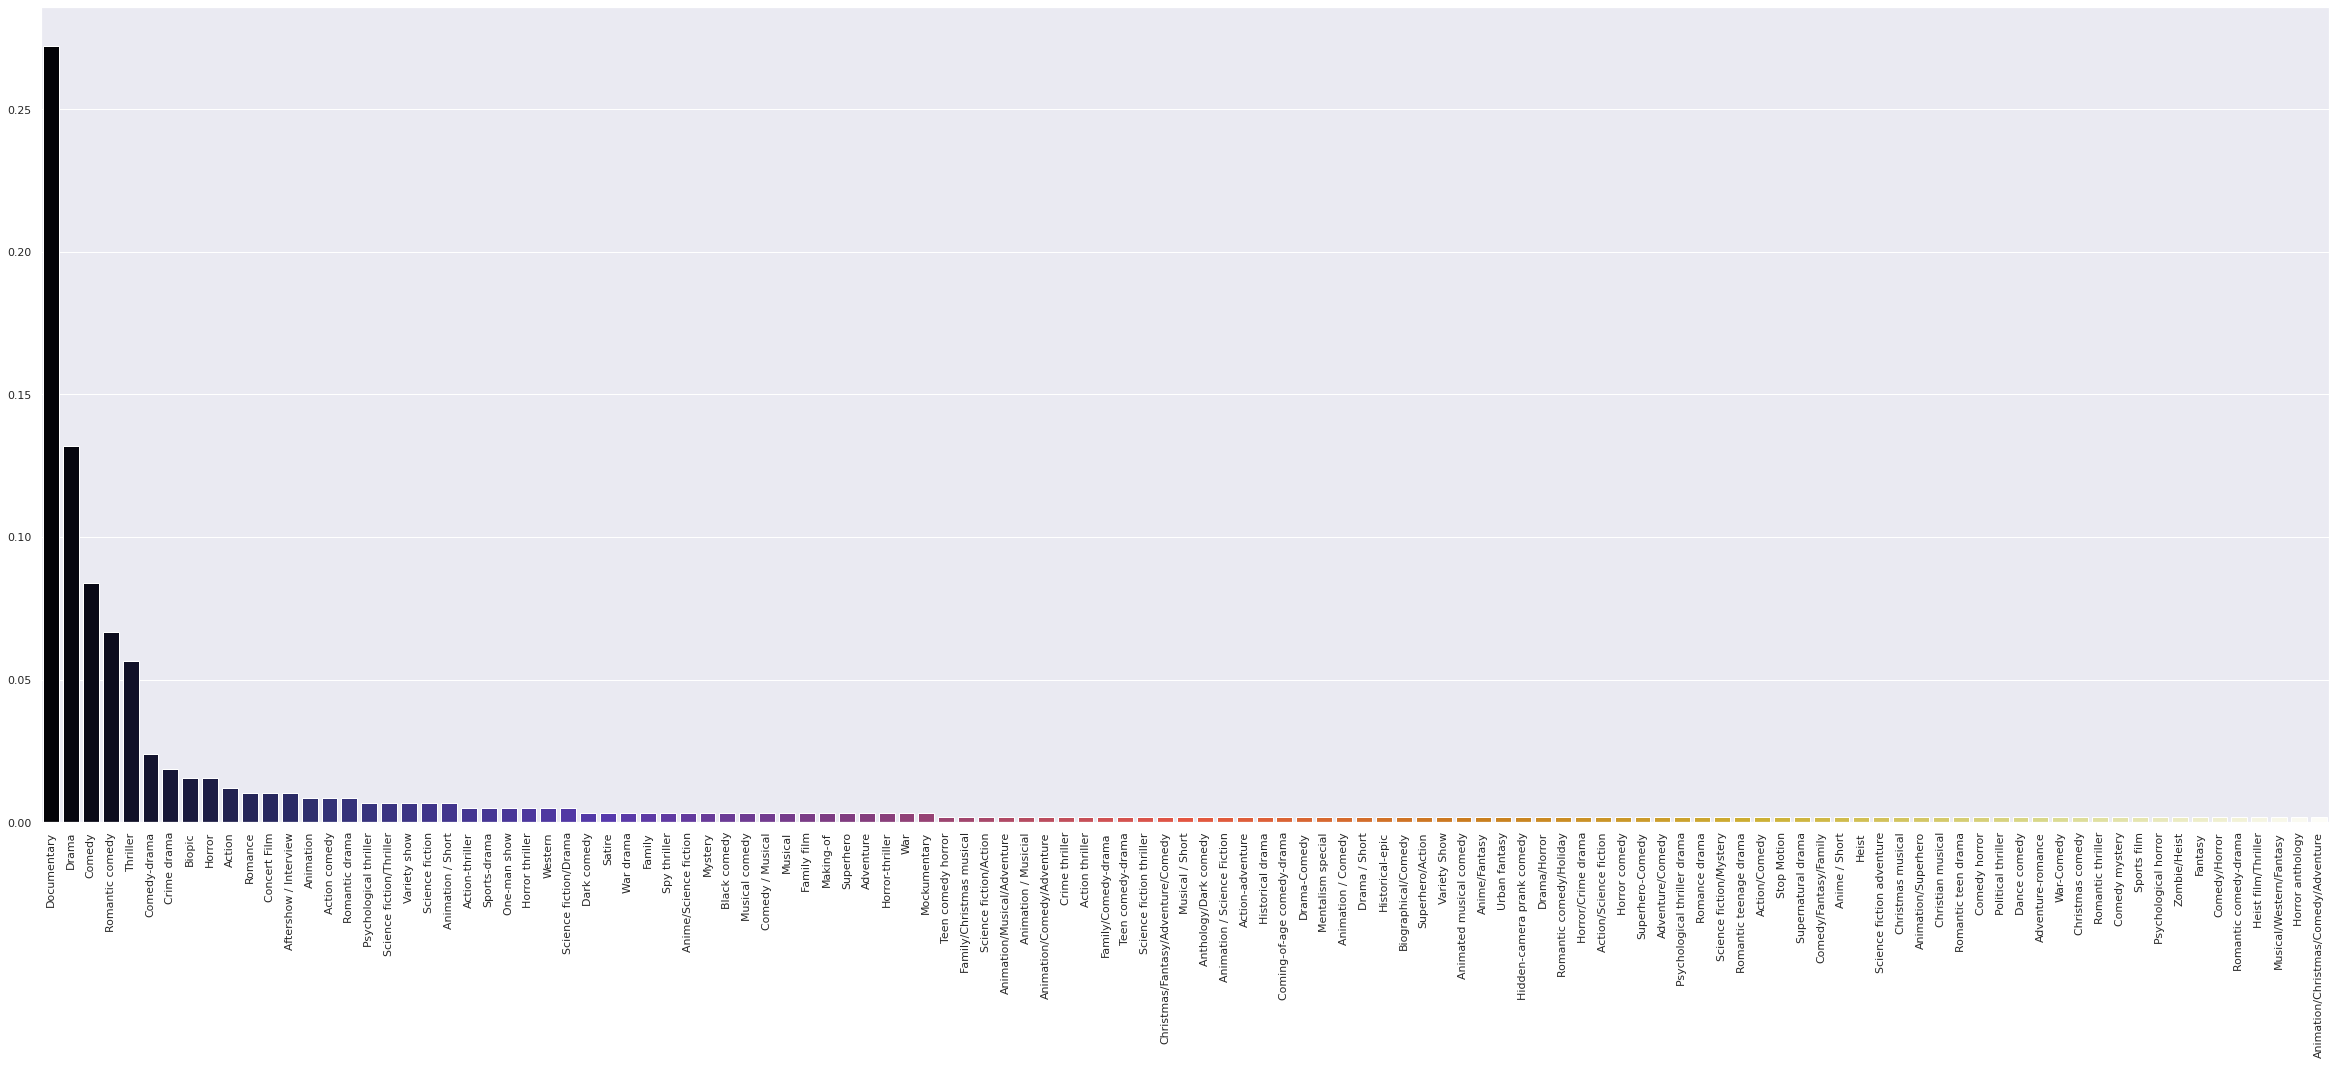

In [ ]:
sns.barplot(x=genre_type.index, y=genre_type.values, palette="CMRmap")
sns.set(rc={'figure.figsize':(41,15)})
plt.xticks(rotation=90)
plt.show()

In [ ]:
#6. Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.
cok_kullanılan_3_dil = netflix_originals.Language.value_counts().nlargest(3)
cok_kullanılan_3_dil

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

In [ ]:
#7. IMDB puanı en yüksek olan ilk 10 film hangileridir?
IMDB_top_10 = netflix_originals.sort_values(by="IMDB Score", ascending=False)[0:10]
IMDB_top_10

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020-10-04
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020-12-08
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015-10-09
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018-12-31
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English,2020-05-20
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English,2019-10-23
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English,2017-11-24
573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.2,English,2019-11-15
571,13th,Documentary,"October 7, 2016",100,8.2,English,2016-10-07


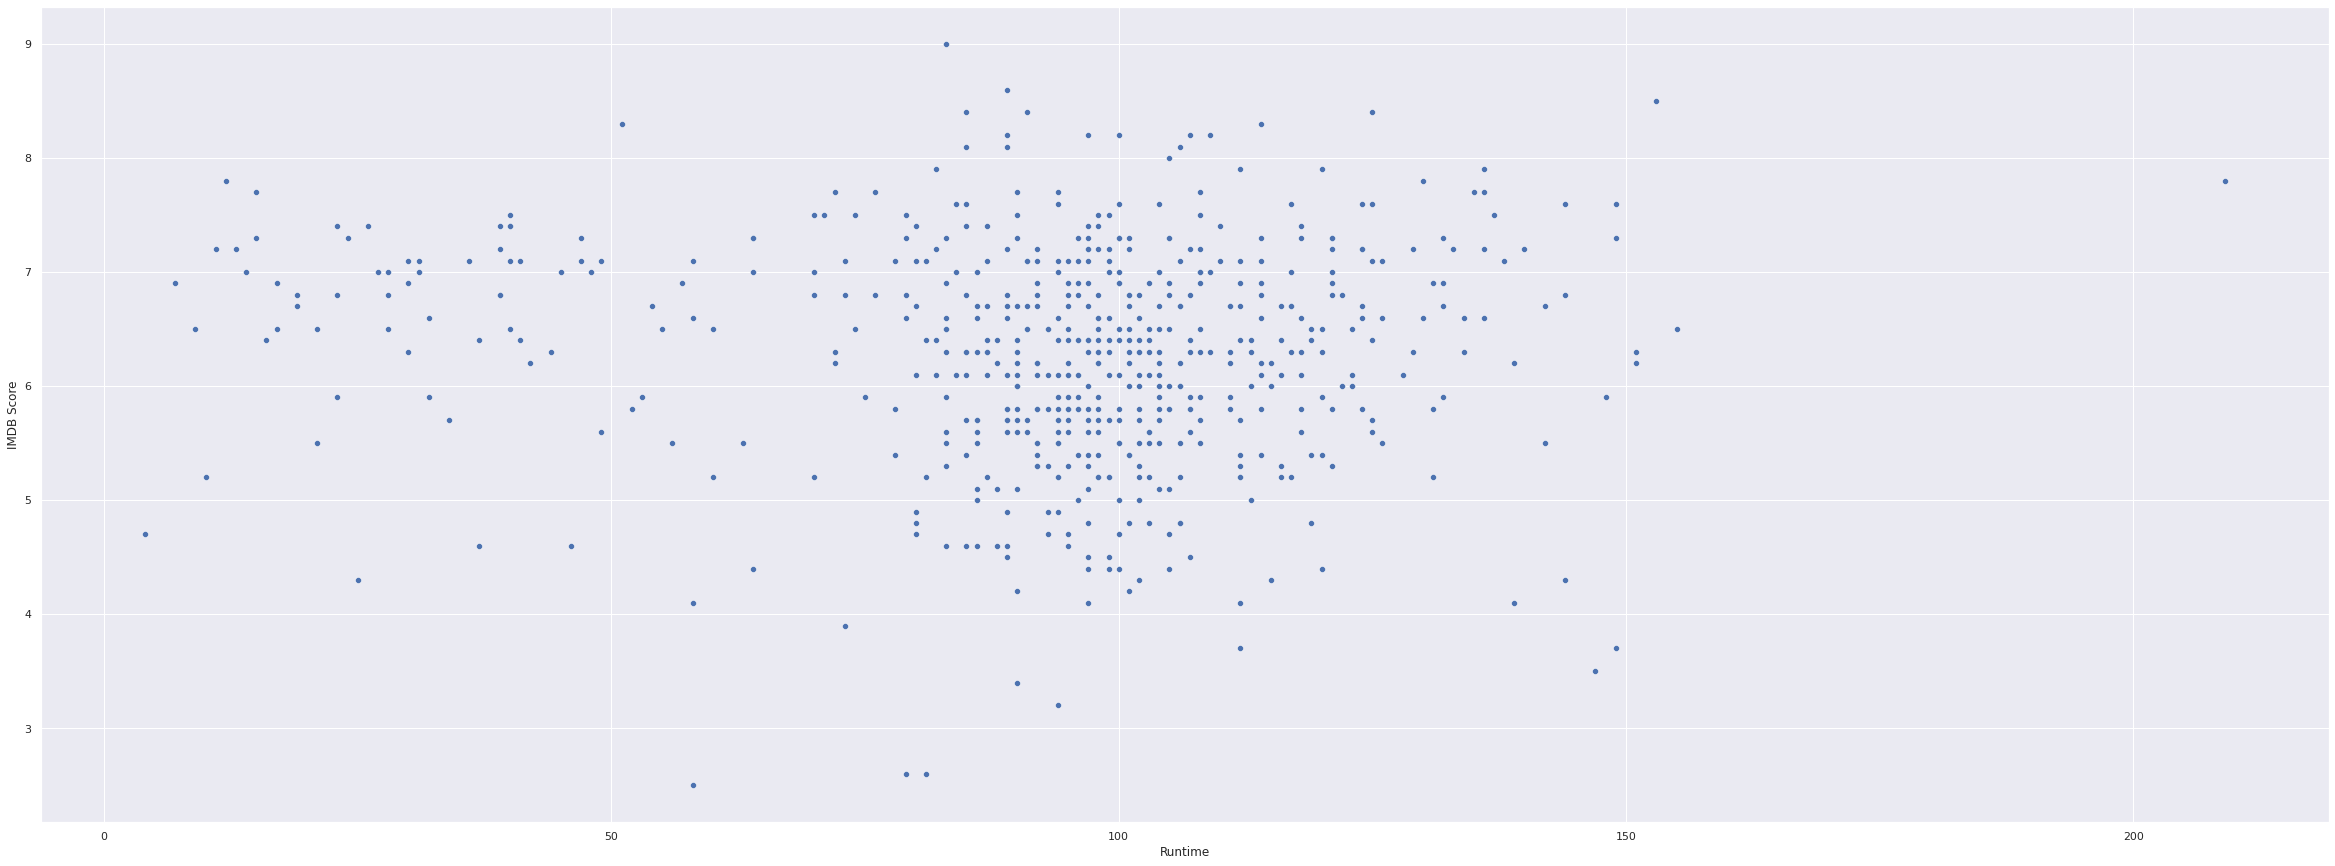

In [ ]:
#8. IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.
#sns.regplot(data=netflix_originals, x='IMDB Score', y='Runtime')
#plt.title('Scatter plot of runtime and IMDB score');

sns.scatterplot(x = "Runtime", y = "IMDB Score", data=netflix_originals)
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

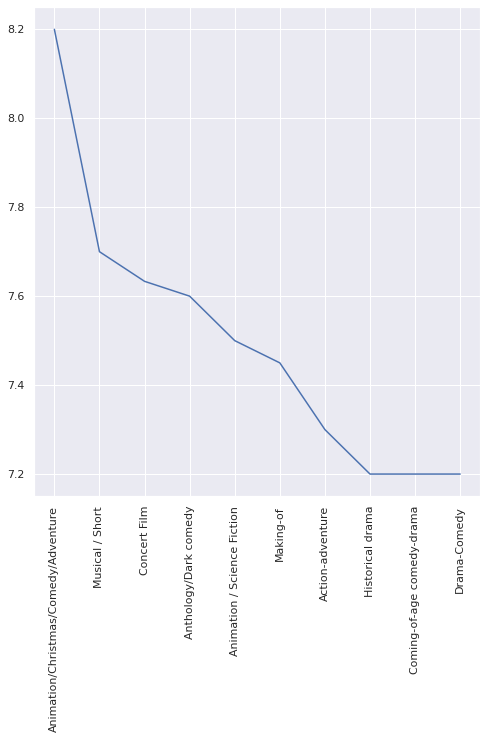

In [ ]:
#9. IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.
ilk_10 = netflix_originals.groupby("Genre")
ilk_genre = ilk_10.mean("IMDB Score").sort_values(by = "IMDB Score", ascending=False)[0:10]

plt.plot(ilk_genre["IMDB Score"])
plt.xticks(rotation=90)

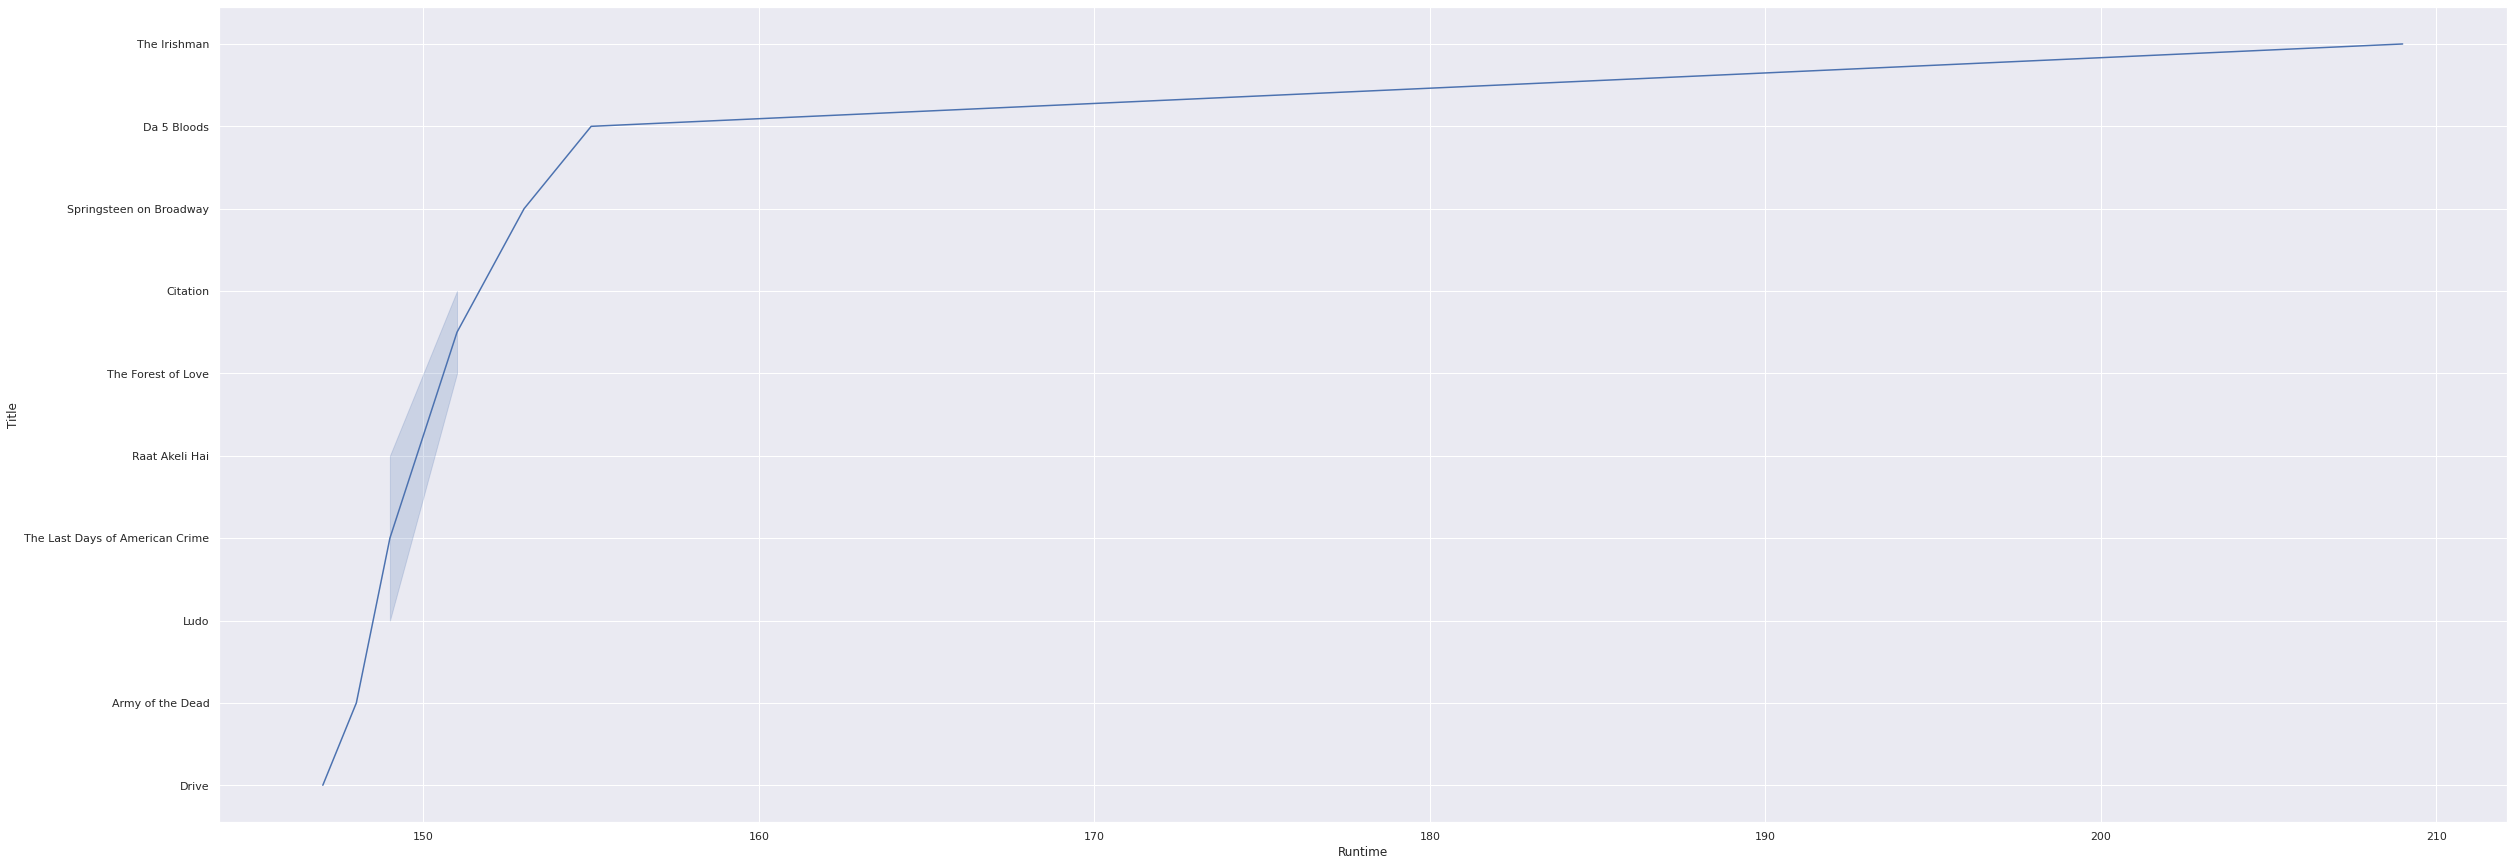

In [ ]:
#10. 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.
runtime_top_10 = netflix_originals.sort_values(by = "Runtime", ascending=False)[0:10]
runtime_top_10
sns.lineplot(y=runtime_top_10["Title"], x=runtime_top_10["Runtime"])
plt.show()

In [ ]:
netflix_originals["Date"] = pd.to_datetime(netflix_originals.Premiere)
netflix_originals["Date"]

0     2019-08-05
1     2020-08-21
2     2019-12-26
3     2018-01-19
4     2020-10-30
         ...    
579   2018-12-31
580   2015-10-09
581   2018-12-16
582   2020-12-08
583   2020-10-04
Name: Date, Length: 584, dtype: datetime64[ns]

In [ ]:
netflix_originals['Year'] = netflix_originals['Date'].dt.year
netflix_originals['Month'] = netflix_originals['Date'].dt.month
netflix_originals['Day'] = netflix_originals['Date'].dt.day_of_week

In [ ]:
#11. Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.
film_sayisi = netflix_originals.Year.value_counts()
film_sayisi

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Year, dtype: int64

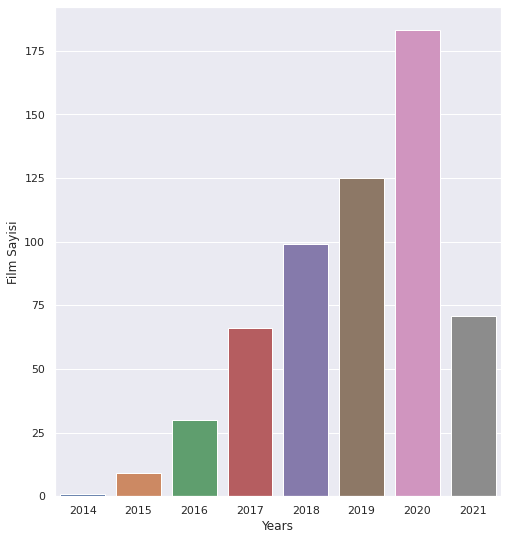

In [ ]:
gra = sns.barplot(x = film_sayisi.index, y= film_sayisi.values)
gra.set(xlabel = "Years", ylabel = "Film Sayisi")
plt.show()

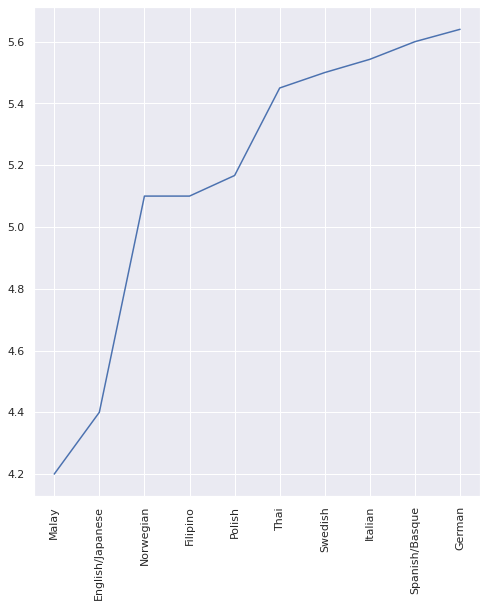

In [ ]:
#12. Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.
diller = netflix_originals.groupby("Language")
dusuk_language = diller.mean("IMDB Score").sort_values(by = "IMDB Score", ascending=True)[0:10]

plt.plot(dusuk_language["IMDB Score"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#13. Hangi yılın toplam "runtime" süresi en fazladır?
runtime_sum = netflix_originals.groupby("Year").sum()
runtime_sum.sort_values(by = "Runtime", ascending=False)[:1]

,Runtime,IMDB Score,Month,Day
Year,,,,
2020,17384,1133.7,1405,552


In [ ]:
#14. Her bir dilin en fazla kullanıldığı "Genre" nedir?
dil_genre = netflix_originals.groupby("Language")
dil_genre.Genre.value_counts().groupby(level=0).head(1)

Language                    Genre                
Bengali                     Documentary                1
Dutch                       Crime drama                1
English                     Documentary              120
English/Akan                War drama                  1
English/Arabic              Documentary                1
English/Hindi               Documentary                2
English/Japanese            Crime drama                1
English/Korean              Action-adventure           1
English/Mandarin            Documentary                2
English/Russian             Documentary                1
English/Spanish             Documentary                5
English/Swedish             Documentary                1
English/Taiwanese/Mandarin  Drama                      1
English/Ukranian/Russian    Documentary                1
Filipino                    Drama                      1
French                      Documentary                6
Georgian                    Documentar

In [ ]:
#15. Veri setinde outlier veri var mıdır? Açıklayınız.
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20)

In [ ]:
clf

LocalOutlierFactor()

In [ ]:
pred = clf.fit_predict(netflix_originals.iloc[:, 4].values.reshape(-1, 1))

In [ ]:
pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
netflix_originals[pred == -1]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date,Year,Month,Day
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05,2019,8,0
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21,2020,8,4
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26,2019,12,3
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19,2018,1,4
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30,2020,10,4
...,...,...,...,...,...,...,...,...,...,...
495,The King,Historical drama,"November 1, 2019",140,7.2,English,2019-11-01,2019,11,4
496,The Road to El Camino: A Breaking Bad Movie,Making-of,"October 29, 2019",13,7.2,English,2019-10-29,2019,10,1
497,The Siege of Jadotville,War,"October 7, 2016",108,7.2,English,2016-10-07,2016,10,4
498,Zion,Documentary,"August 10, 2018",11,7.2,English,2018-08-10,2018,8,4
